In [464]:
# load python packages
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib
import IPython
import sklearn
import keras



In [465]:
# load dataset
import scipy.io 
dataset = scipy.io.loadmat('dataset.mat')

In [466]:
# get training and testing sets
x_train = dataset['train_image']
x_test = dataset['test_image']
y_train = dataset['train_label']
y_test = dataset['test_label']

In [467]:
# print package version 
print('numpy:', np.__version__)
print('scipy:', sp.__version__)
print('matplotlib:', matplotlib.__version__)
print('iPython:', IPython.__version__)
print('scikit-learn:', sklearn.__version__)
print('keras: ', keras.__version__)
import tensorflow as tf
print('Tensorflow: ', tf.__version__)

numpy: 1.16.3
scipy: 1.2.1
matplotlib: 3.0.3
iPython: 7.5.0
scikit-learn: 0.20.3
keras:  2.2.4
Tensorflow:  1.13.1


In [468]:
class KNNClassifier:
    def __init__(self,k):
        assert k>=1,'k must be valid'
        self.k=k
        self._x_train=None
        self._y_train=None
 
    def fit(self,x_train,y_train):
        self._x_train=x_train
        self._y_train=y_train
        return self
 
    def _predict(self,x):
        d=[np.sqrt(np.sum((x_i-x)**2)) for x_i in self._x_train]
        nearest=np.argsort(d)
        top_k=[self._y_train[i] for i in nearest[:self.k]]
        votes=Counter(top_k)
        return votes.most_common(1)[0][0]
 
    def predict(self,X_predict):
        y_predict=[self._predict(x1) for x1 in X_predict]
        return np.array(y_predict)
 
    def __repr__(self):
        return 'knn(k=%d):'%self.k
 
    def score(self,x_test,y_test):
        y_predict=self.predict(x_test)
        return sum(y_predict==y_test)/len(x_test)


In [470]:
trainpart = []
testpart = []


def main():
    for i in range(1,11):
        knn_clf=KNNClassifier(k=i)
        knn_clf.fit(x_train,y_train)
        
        y_predict=my_knn.predict(x_test)
        print(accuracy_score(y_test,y_predict))
        score=my_knn.score(x_test,y_test)
        trainpart.append(knn_clf.score(x_train,y_train))
        testpart.append(knn_clf.score(x_train,y_train))

if __name__ == '__main__':
    main()



TypeError: unhashable type: 'numpy.ndarray'

In [471]:
# import keras packages
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D , MaxPooling2D
from keras import backend as K

In [472]:
# batch size for gradient descent
batch_size = 32
# number of classes
num_classes = 2
# number of epochs (1 epoch = amount of iterations that covers the whole training set)
epochs = 200 # try a larger number of epochs here (for example 10 or larger)
# input image dimensions
nmb_samples, img_rows, img_cols = x_train.shape[0], x_train.shape[1], x_train.shape[2]
nmb_test_samples = x_test.shape[0]

In [473]:
# adjust training image format
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

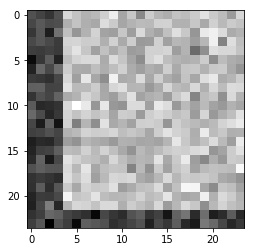

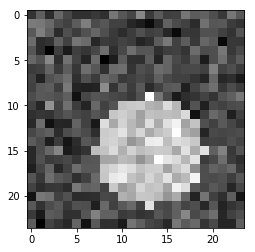

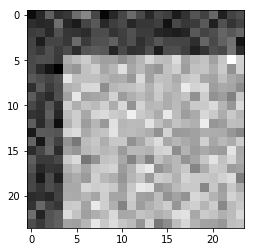

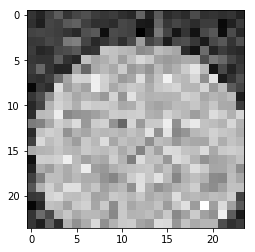

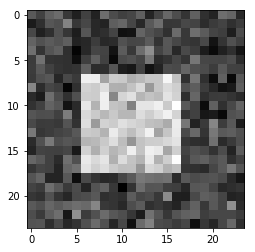

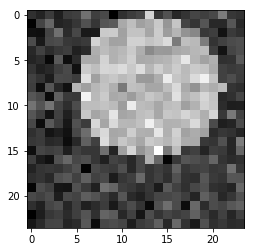

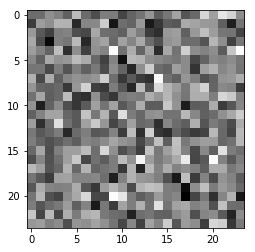

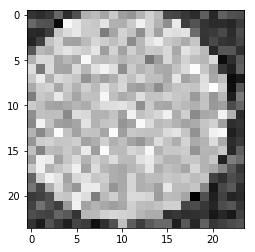

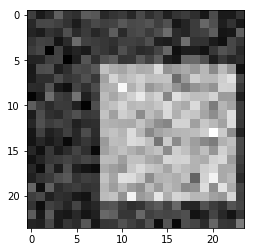

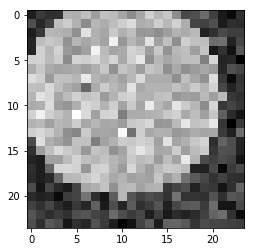

In [431]:
# display some training images
for i in range(10):
    first_image = x_train[i,:,:]
    first_image = np.array(first_image, dtype='float')
    pixels = first_image.reshape((img_rows, img_cols))
    plt.imshow(pixels, cmap='gray')
    plt.show()

In [432]:
# type casting and dimensionality transformations
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(200, 24, 24, 1) (100, 24, 24, 1) (200, 2) (100, 2)


In [433]:
# define MLP model (2 hidden layers with 512 nodes, activated by ReLUs)

model = Sequential()
model.add(Conv2D(6, kernel_size = (5, 5),
                activation='relu',
                input_shape=input_shape))
model.add(MaxPooling2D(pool_size= (2,2)))
model.add(Conv2D(16,(5, 5),activation='relu'))
model.add(Flatten())
model.add(Dense(20, activation='relu', input_shape=(img_rows*img_cols,)))
model.add(Dense(40, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [434]:
# compile model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [435]:
# training
history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, y_test))

Train on 200 samples, validate on 100 samples
Epoch 1/200
200/200 [==============================] - 1s 4ms/step - loss: 0.7128 - acc: 0.5100 - val_loss: 0.7104 - val_acc: 0.5000
Epoch 2/200
200/200 [==============================] - 0s 501us/step - loss: 0.6921 - acc: 0.5400 - val_loss: 0.6837 - val_acc: 0.5900
Epoch 3/200
200/200 [==============================] - 0s 425us/step - loss: 0.6957 - acc: 0.5500 - val_loss: 0.6838 - val_acc: 0.6100
Epoch 4/200
200/200 [==============================] - 0s 443us/step - loss: 0.6869 - acc: 0.5150 - val_loss: 0.6807 - val_acc: 0.5100
Epoch 5/200
200/200 [==============================] - 0s 572us/step - loss: 0.6804 - acc: 0.5800 - val_loss: 0.6970 - val_acc: 0.5000
Epoch 6/200
200/200 [==============================] - 0s 519us/step - loss: 0.6887 - acc: 0.5550 - val_loss: 0.7785 - val_acc: 0.5000
Epoch 7/200
200/200 [==============================] - 0s 525us/step - loss: 0.7038 - acc: 0.6000 - val_loss: 0.7289 - val_acc: 0.5000
Epoch 8/200

Epoch 61/200
200/200 [==============================] - 0s 525us/step - loss: 0.0965 - acc: 0.9800 - val_loss: 0.1845 - val_acc: 0.9300
Epoch 62/200
200/200 [==============================] - 0s 543us/step - loss: 0.0932 - acc: 0.9750 - val_loss: 0.2161 - val_acc: 0.9100
Epoch 63/200
200/200 [==============================] - 0s 506us/step - loss: 0.0822 - acc: 0.9900 - val_loss: 0.3200 - val_acc: 0.9000
Epoch 64/200
200/200 [==============================] - 0s 517us/step - loss: 0.0804 - acc: 0.9800 - val_loss: 0.1831 - val_acc: 0.9100
Epoch 65/200
200/200 [==============================] - 0s 463us/step - loss: 0.1346 - acc: 0.9350 - val_loss: 0.3619 - val_acc: 0.8500
Epoch 66/200
200/200 [==============================] - 0s 483us/step - loss: 0.0895 - acc: 0.9650 - val_loss: 0.1954 - val_acc: 0.9100
Epoch 67/200
200/200 [==============================] - 0s 509us/step - loss: 0.0752 - acc: 0.9850 - val_loss: 0.2191 - val_acc: 0.8800
Epoch 68/200
200/200 [==========================

200/200 [==============================] - 0s 491us/step - loss: 0.0054 - acc: 1.0000 - val_loss: 0.1119 - val_acc: 0.9500
Epoch 122/200
200/200 [==============================] - 0s 493us/step - loss: 0.0018 - acc: 1.0000 - val_loss: 0.0853 - val_acc: 0.9600
Epoch 123/200
200/200 [==============================] - 0s 465us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.0925 - val_acc: 0.9500
Epoch 124/200
200/200 [==============================] - 0s 509us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.0945 - val_acc: 0.9500
Epoch 125/200
200/200 [==============================] - 0s 421us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.1193 - val_acc: 0.9500
Epoch 126/200
200/200 [==============================] - 0s 501us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 0.1355 - val_acc: 0.9500
Epoch 127/200
200/200 [==============================] - 0s 573us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.0971 - val_acc: 0.9300
Epoch 128/200
200/200 [==============================] 

Epoch 180/200
200/200 [==============================] - 0s 511us/step - loss: 1.3261e-04 - acc: 1.0000 - val_loss: 0.0972 - val_acc: 0.9500
Epoch 181/200
200/200 [==============================] - 0s 482us/step - loss: 1.3085e-04 - acc: 1.0000 - val_loss: 0.0980 - val_acc: 0.9500
Epoch 182/200
200/200 [==============================] - 0s 532us/step - loss: 1.2218e-04 - acc: 1.0000 - val_loss: 0.1001 - val_acc: 0.9600
Epoch 183/200
200/200 [==============================] - 0s 627us/step - loss: 1.1709e-04 - acc: 1.0000 - val_loss: 0.1155 - val_acc: 0.9600
Epoch 184/200
200/200 [==============================] - 0s 506us/step - loss: 1.1955e-04 - acc: 1.0000 - val_loss: 0.0943 - val_acc: 0.9600
Epoch 185/200
200/200 [==============================] - 0s 675us/step - loss: 1.1948e-04 - acc: 1.0000 - val_loss: 0.0931 - val_acc: 0.9500
Epoch 186/200
200/200 [==============================] - 0s 601us/step - loss: 1.1869e-04 - acc: 1.0000 - val_loss: 0.0882 - val_acc: 0.9600
Epoch 187/200

In [436]:
# print train and test losses and classification accuracies
score = model.evaluate(x_train, y_train, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train loss: 0.00020767201232956722
Train accuracy: 1.0
Test loss: 0.19077263981103898
Test accuracy: 0.96


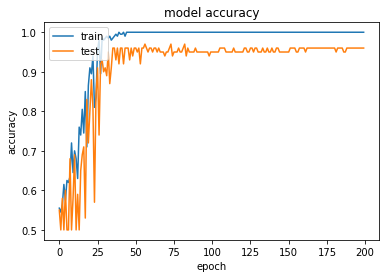

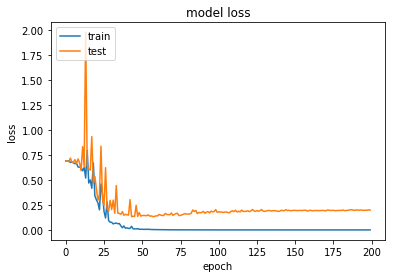

In [139]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [140]:
model = Sequential()
model.add(Conv2D(6, kernel_size = (5, 5),
                activation='relu',
                input_shape=input_shape))
model.add(MaxPooling2D(pool_size= (2,2)))
model.add(Conv2D(16,(5, 5),activation='relu'))
model.add(Flatten())
model.add(Dense(20, activation='relu', input_shape=(img_rows*img_cols,)))
model.add(Dense(40, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, y_test))
score = model.evaluate(x_train, y_train, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Train on 200 samples, validate on 100 samples
Epoch 1/200
200/200 [==============================] - 1s 4ms/step - loss: 0.6927 - acc: 0.5400 - val_loss: 0.6911 - val_acc: 0.6100
Epoch 2/200
200/200 [==============================] - 0s 889us/step - loss: 0.6903 - acc: 0.5900 - val_loss: 0.6911 - val_acc: 0.5100
Epoch 3/200
200/200 [==============================] - 0s 464us/step - loss: 0.6880 - acc: 0.5700 - val_loss: 0.6868 - val_acc: 0.6300
Epoch 4/200
200/200 [==============================] - 0s 459us/step - loss: 0.6792 - acc: 0.6300 - val_loss: 0.6981 - val_acc: 0.5000
Epoch 5/200
200/200 [==============================] - 0s 545us/step - loss: 0.6817 - acc: 0.5550 - val_loss: 0.6773 - val_acc: 0.6500
Epoch 6/200
200/200 [==============================] - 0s 531us/step - loss: 0.6627 - acc: 0.6350 - val_loss: 0.6543 - val_acc: 0.6500
Epoch 7/200
200/200 [==============================] - 0s 564us/step - loss: 0.6839 - acc: 0.5750 - val_loss: 0.6850 - val_acc: 0.5700
Epoch 8/200

Epoch 61/200
200/200 [==============================] - 0s 568us/step - loss: 0.0055 - acc: 1.0000 - val_loss: 0.1932 - val_acc: 0.9300
Epoch 62/200
200/200 [==============================] - 0s 599us/step - loss: 0.0088 - acc: 1.0000 - val_loss: 0.1214 - val_acc: 0.9400
Epoch 63/200
200/200 [==============================] - 0s 601us/step - loss: 0.0088 - acc: 1.0000 - val_loss: 0.1218 - val_acc: 0.9400
Epoch 64/200
200/200 [==============================] - 0s 560us/step - loss: 0.0050 - acc: 1.0000 - val_loss: 0.1368 - val_acc: 0.9500
Epoch 65/200
200/200 [==============================] - 0s 569us/step - loss: 0.0042 - acc: 1.0000 - val_loss: 0.1702 - val_acc: 0.9400
Epoch 66/200
200/200 [==============================] - 0s 557us/step - loss: 0.0049 - acc: 1.0000 - val_loss: 0.1177 - val_acc: 0.9600
Epoch 67/200
200/200 [==============================] - 0s 647us/step - loss: 0.0032 - acc: 1.0000 - val_loss: 0.1390 - val_acc: 0.9500
Epoch 68/200
200/200 [==========================

200/200 [==============================] - 0s 708us/step - loss: 8.9965e-05 - acc: 1.0000 - val_loss: 0.1410 - val_acc: 0.9700
Epoch 121/200
200/200 [==============================] - 0s 605us/step - loss: 8.5201e-05 - acc: 1.0000 - val_loss: 0.1376 - val_acc: 0.9700
Epoch 122/200
200/200 [==============================] - 0s 542us/step - loss: 8.9013e-05 - acc: 1.0000 - val_loss: 0.1515 - val_acc: 0.9700
Epoch 123/200
200/200 [==============================] - 0s 540us/step - loss: 8.5953e-05 - acc: 1.0000 - val_loss: 0.1414 - val_acc: 0.9700
Epoch 124/200
200/200 [==============================] - 0s 619us/step - loss: 7.6429e-05 - acc: 1.0000 - val_loss: 0.1498 - val_acc: 0.9600
Epoch 125/200
200/200 [==============================] - 0s 650us/step - loss: 7.5442e-05 - acc: 1.0000 - val_loss: 0.1488 - val_acc: 0.9700
Epoch 126/200
200/200 [==============================] - 0s 611us/step - loss: 7.3825e-05 - acc: 1.0000 - val_loss: 0.1441 - val_acc: 0.9700
Epoch 127/200
200/200 [====

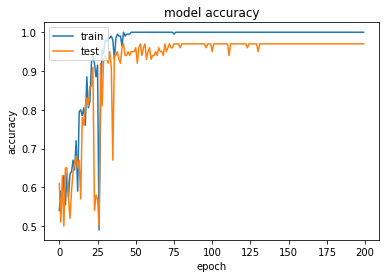

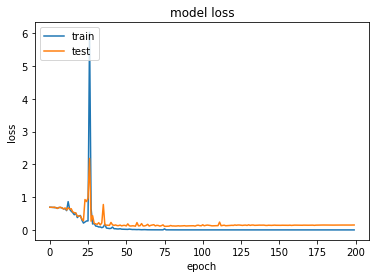

In [141]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()